# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [1]:
# импорт требуемых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from numpy.random import RandomState
from scipy import stats as st
from IPython.display import display_html
from IPython.core.display import display, HTML
from IPython.display import display, Math, Latex

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,cross_validate,RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error, make_scorer
# Убираем ограничение по выводу столбцов
pd.set_option('display.max_columns', None)

In [2]:
try:
    df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
except FileNotFoundError:
    df = pd.read_csv('gold_recovery_full_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')
    df_train = pd.read_csv('gold_recovery_train_new.csv')

In [3]:
def info(df):
    print('Общая информация о датафрейме')
    print()
    df.info()
    print()
    print('Строки датафрейма')
    display(df.head())
    print()
    print('Метод descrribe() для датафрейма')
    display(df.describe())
    print('Процент пропущенных значений')
    print()
    display(pd.DataFrame(df.isna().mean().round(4)*100).sort_values(by=0,ascending=False).style.background_gradient('coolwarm'))

In [4]:
info(df)

Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                        

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


Метод descrribe() для датафрейма


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

Процент пропущенных значений



,0
secondary_cleaner.output.tail_sol,8.990000
rougher.input.floatbank11_xanthate,2.330000
rougher.state.floatbank10_e_air,2.240000
primary_cleaner.output.concentrate_sol,1.900000
secondary_cleaner.state.floatbank2_a_air,1.130000
final.output.concentrate_sol,1.090000
rougher.input.feed_size,0.750000
primary_cleaner.output.concentrate_pb,0.600000
primary_cleaner.input.xanthate,0.540000
final.output.tail_pb,0.520000


In [5]:
info(df_test)

Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-n

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50


Метод descrribe() для датафрейма


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5287.000000,5289.000000,5269.000000,5290.000000,5285.000000,5290.000000,5282.000000,5265.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5287.000000,5290.000000,5288.000000,5290.000000,5281.000000,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,1.544844e+03,-500.199527,9.371940,3.798082,489.800620,55.951097,37.716648,9.334682,13.855759,6.467745,13.922328,6.512103,1053.400166,-395.732530,1318.926879,-475.241428,1301.595477,-474.836671,1214.847960,-475.682272,1056.648995,-469.029688,997.949719,-470.482465,26.312630,-502.750897,21.949119,-501.987097,25.402926,-507.490314,2.098211e+01,-506.627916,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,1.247731e+02,31.045257,1.926264,0.954859,108.036326,19.081758,5.491415,1.619521,3.350852,1.065114,3.223769,0.886989,121.139309,91.085505,156.450366,45.649466,171.269667,45.859866,185.763319,47.844967,131.542839,59.325990,128.218869,60.759318,3.429852,28.756505,4.354961,34.582722,6.526457,47.620908,6.736179e+00,44.528673,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,4.039220e-32,-799.794250,0.568441,0.273677,0.002986,0.046369,1.393488,0.568632,0.001147,0.000568,0.000077,0.006985,-0.042069,-657.949759,-0.721806,-650.245277,-0.056636,-647.544439,-0.992219,-648.390665,-1.982295,-649.267537,-2.593390,-649.949283,0.20

Процент пропущенных значений



,0
rougher.input.floatbank11_xanthate,0.470000
rougher.input.feed_sol,0.400000
secondary_cleaner.state.floatbank3_a_air,0.170000
rougher.input.floatbank11_sulfate,0.150000
primary_cleaner.input.depressant,0.090000
rougher.input.floatbank10_sulfate,0.090000
primary_cleaner.input.xanthate,0.080000
primary_cleaner.input.sulfate,0.080000
rougher.input.feed_rate,0.060000
secondary_cleaner.state.floatbank2_a_air,0.060000


In [6]:
info(df_train) 

Общая информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                        

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.


Метод descrribe() для датафрейма


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.000000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148

Процент пропущенных значений



,0
secondary_cleaner.output.tail_sol,11.340000
rougher.state.floatbank10_e_air,3.080000
rougher.input.floatbank11_xanthate,3.020000
primary_cleaner.output.concentrate_sol,2.020000
secondary_cleaner.state.floatbank2_a_air,1.530000
final.output.concentrate_sol,1.490000
rougher.input.feed_size,1.020000
rougher.input.feed_pb,0.710000
primary_cleaner.input.xanthate,0.710000
final.output.tail_pb,0.710000


Посмотрим корреляцию признаков в тренировочной выборке для ее целевой переменной: 

In [7]:
corr  = df_train.corr()\
        .sort_values('rougher.output.recovery', ascending=False)\
        .filter(items=['rougher.output.recovery'])\
        .reset_index()
corr.style.background_gradient('coolwarm')

,index,rougher.output.recovery
0,rougher.output.recovery,1.000000
1,rougher.output.concentrate_ag,0.660629
2,rougher.output.concentrate_sol,0.569787
3,rougher.output.concentrate_au,0.556946
4,rougher.output.concentrate_pb,0.545055
5,final.output.recovery,0.328307
6,primary_cleaner.input.sulfate,0.274956
7,secondary_cleaner.state.floatbank4_a_air,0.250971
8,secondary_cleaner.state.floatbank4_b_air,0.240518
9,rougher.input.floatbank10_xanthate,0.238837


**Вывод:**

 Прослеживается линейная зависимость между признаками и целевым признаком `rougher.output.recovery`: 
 
* `ougher.output.concentrate_ag` — 0.660629
* `rougher.output.concentrate_sol` — 0.569787
* `rougher.output.concentrate_au` — 0.556946
* `rougher.output.concentrate_pb` — 0.545055

# Технологический процесс

Как золото получают из руды? Изучите внимательно стадии процесса.
Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.


Опишем каждую стадию:
    
**1. Флотация**

Во флотационную установку подаётся золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

**2. Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.


**Описание данных**


**Технологический процесс** 

* `Rougher feed` — исходное сырье
* `Rougher additions` (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
* `Xanthate` **— ксантогенат (промотер, или активатор флотации);
* `Sulphate` — сульфат (на данном производстве сульфид натрия);
* `Depressant` — депрессант (силикат натрия).
* `Rougher process (англ. «грубый процесс»)` — флотация
* `Rougher tails` — отвальные хвосты
* `Float banks` — флотационная установка
* `Cleaner process` — очистка
* `Rougher Au` — черновой концентрат золота
* `Final Au` — финальный концентрат золота

**Параметры этапов**

* `air amount` — объём воздуха
* `fluid levels` — уровень жидкости
* `feed size` — размер гранул сырья
* `feed rate` — скорость подачи

**Наименование признаков**  

Наименование признаков должно быть такое:

* `[этап].[тип_параметра].[название_параметра]`

    Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

* `rougher` — флотация
* `primary_cleaner` — первичная очистка
* `secondary_cleaner` — вторичная очистка
* `final` — финальные характеристики
    
    
Возможные значения для блока [тип_параметра]:

* `input` — параметры сырья
* `output` — параметры продукта
* `state` — параметры, характеризующие текущее состояние этапа
* `calculation` — расчётные характеристики

### Проверка эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдём MAE между вашими расчётами и значением признака. 

***Эффективность обогащения*** рассчитывается по формуле:

$$Recovery = \frac{C * (F - T)}{F * (C - T)} * 100 % $$

где:

* $  \:C\: — \:доля \:золота \:в \:концентрате \:после \:флотации/очистки$

* $ \:F\: — \:доля \:золота \:в \:сырье/концентрате \:до \:флотации/очистки$

* $ \:T\: — \:доля \:золота \:в \:отвальных \:хвостах \:после \:флотации/очистки$

In [8]:
def recovery(df):
    C = df['rougher.output.concentrate_au']
    F = df['rougher.input.feed_au']
    T = df['rougher.output.tail_au']
    recovery = ((C*(F-T))/(F*(C-T)))*100
    return recovery

In [9]:
recovery(df_train)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [10]:
mean_absolute_error(df_train['rougher.output.recovery'], recovery(df_train))

9.73512347450521e-15

**Вывод**

Значение `MAE` достаточно невысокое, а значит эффективность обогащения рассчитана правильно.

### Анализ признаков, недоступных в тестовой выборке

In [11]:
columns_not_test = [x for x in df_train.columns if x not in df_test.columns]
columns_not_test

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [12]:
len(columns_not_test)

34

Отсутствуют параметры, оценивающие эффективность обогащения чернового и финального концентрата(rougher.output.recovery,final.output.recovery) — `целевые признаки`, добавим их к тестовой выборке:

In [13]:
# преобразуем дату в индекс
df.set_index('date', inplace=True) 
df_test.set_index('date', inplace=True)
df_train.set_index('date', inplace=True)

In [14]:
df_test = df_test.merge(df.loc[:,['rougher.output.recovery', 'final.output.recovery']], on='date')

Удалим отсутствующие стоблцы 

In [15]:
for column in df_train.columns:
    if column not in df_test.columns:
        df_train.drop(column, axis=1, inplace=True)

Проверим результат

In [16]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(19439, 86)
(14149, 54)
(5290, 54)


**Вывод**

В тестовой выборке обнаружено 34 пропущенных признака 30 из них относятся к параметрам продукта и только 4 к расчетным характеристикам:


* 9 пропущенных признаков этапа `final`, 8 `primary_cleaner`, `9` `rougher`, `4` `secondary_cleaner` относятся к параметрам продукта


* 4 пропущенных признака этапа `rougher` относятся к расчетным характеристикам

* На всех этапах отсутствует информация о хвостовых частях

* Во всех этапах, кроме повторной очистки отсутствует информация о доле металлов

* У `финального этапа` и `этапа флотации` отсутствуют признаки обогащения

* Так же отсутствуют данные о некоторых реагентах на этапе `флотации`

Так же отсутствовали, необходимые `целевые признаки` (`rougher.output.recovery`, `final.output.recovery`), которые были добавлены в тестовую выборку.

### Заполнение пропусков

In [17]:
# заполним пропуски
df.fillna(method='ffill', axis=0, inplace=True)
df_train.fillna(method='ffill', axis=0, inplace=True)
df_test.fillna(method='ffill', axis=0, inplace=True)

In [18]:
df.isna().mean()

final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
final.output.recovery                         0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 86, dtype: float64

In [19]:
df_train.isna().mean()

final.output.recovery                         0.0
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0


In [20]:
df_test.isna().mean() 

primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.floatbank10_xanthate            0.0


Пропуски заполнены успешно

### Вывод

*Исходные данные, состоят из трех выборок:*  
* `gold_recovery_full_new` - *исходные данные;*  
* `gold_recovery_train_new` - *обучающая выборка;*  
* `gold_recovery_test_new` - *тестовая выборка.*  

Выборки представляют собой выгруженные сырые данные процесса технологической обработки золотоносной руды.  
* Параметры сырья, подающегося во флотационную установку на различных этапах очистки(флотация, первичная и вторичная очистки), а так же полученные после обогащения черновой концентрат и «отвальные хвосты». - `признаки`  
* Параметры, оценивающие эффективность обогащения чернового и финального концентрата(`rougher.output.recovery`,`final.output.recovery`). - `целевые признаки`.  
* В тестовой выборке отсутствует 34 колонки(`включая оба целевых признака`), доступные в исходных данных и обучающей выборке. Вероятнее всего это связано с тем, что некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. 
* Были заполнены пропуски
* Данные были подготовлены к дальнейшей работе, удалены отсутствующие в тестовой выборке столбцы.

## Анализ данных

### Анализ концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Выберем нужные нам столбцы (этапы), а именно:

- сырьё в исходном виде
- после флотации
- после первичной обработки
- финальный концентрат

In [21]:
# выборки по концентрациям каждого металла на всех этапах очистки
au_concentrate = df[['rougher.input.feed_au', 'rougher.output.concentrate_au',
                            'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
ag_concentrate = df[['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
                            'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
pb_concentrate = df[['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
                            'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

In [22]:
columns_name = ['Исходное сырье','Флотация','Первичная очистка', 'Вторичная очистка']

In [23]:
def bar_chart_met(df, metal):
    '''
    Функция выводит столбчатые диаграммы концентрации, подаваемых в аргумент веществ.
    '''
   
    df.columns = columns_name

    sns.set_theme(style="whitegrid")
    plots = sns.catplot(data=df, kind='bar', ci = 0,palette="dark", alpha=0.6, height=6)
    
    
    plt.xlabel("Этапы очистки", fontsize=15)
    plt.title(f'Изменение концентрации {metal}', fontsize=20)
    plt.xticks(rotation=90)
    plt.show()
    
def proportion(df,metal):
    '''
    Функция выводит круговые диаграммы концентрации, подаваемых в аргумент веществ.
    '''
    
    df_med = df.median(axis=0) 
    df_med.plot(kind='pie', figsize=(9, 9), autopct='%.2f%%',subplots=True)
    ax = plt.gca()
    ax.set_ylabel('')
    ax.set_title(f'Изменение концентрации {metal}',fontsize=15)
    plt.show()

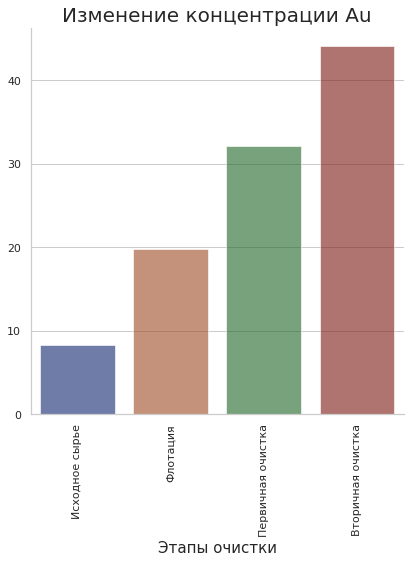

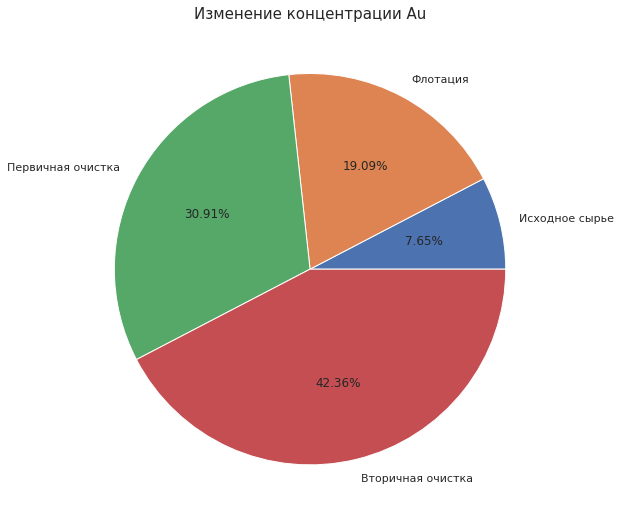

In [24]:
bar_chart_met(au_concentrate, 'Au')
proportion(au_concentrate, 'Au')

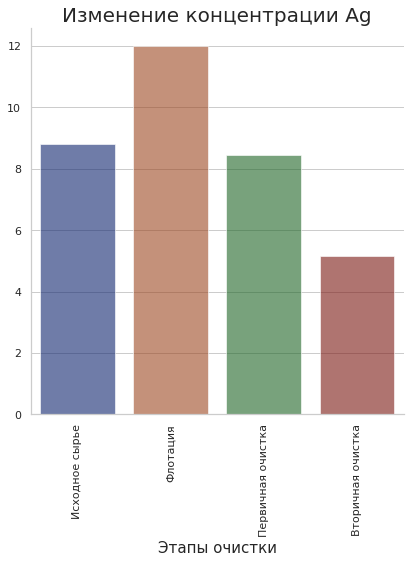

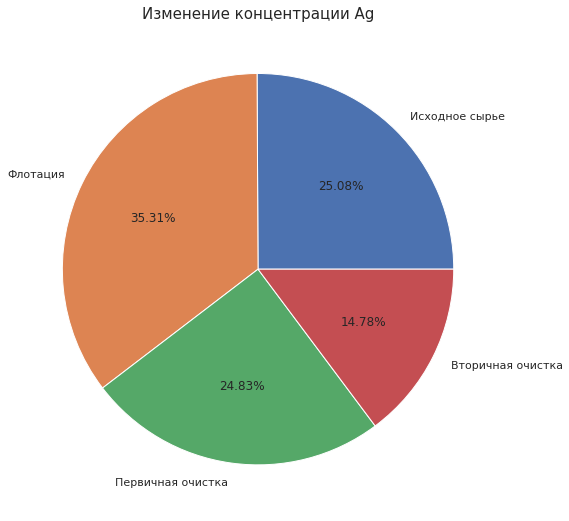

In [25]:
bar_chart_met(ag_concentrate, 'Ag')
proportion(ag_concentrate, 'Ag')

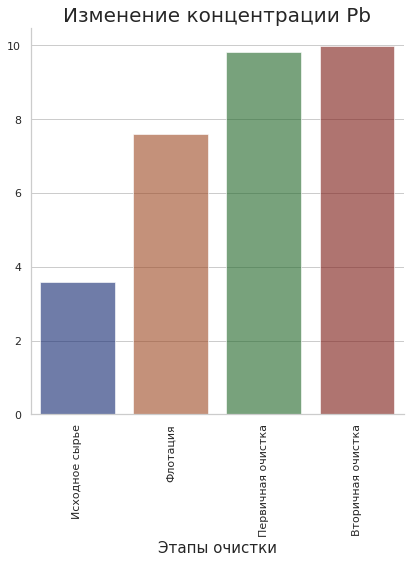

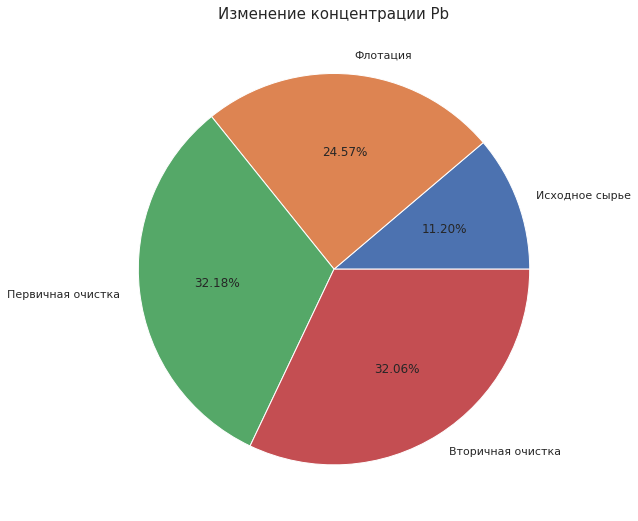

In [26]:
bar_chart_met(pb_concentrate, 'Pb')
proportion(pb_concentrate, 'Pb')

**Вывод**
* *Концентрация золота, в процессе обработки увеличивается с 8% до 42%*  
* *Концентрация серебра, в процессе обработки уменьшается с 25% до 15%*  
* *Концентрация свинца, в процессе обработки увеличилась с 11% до 32% (значительно после флотации)*  


### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

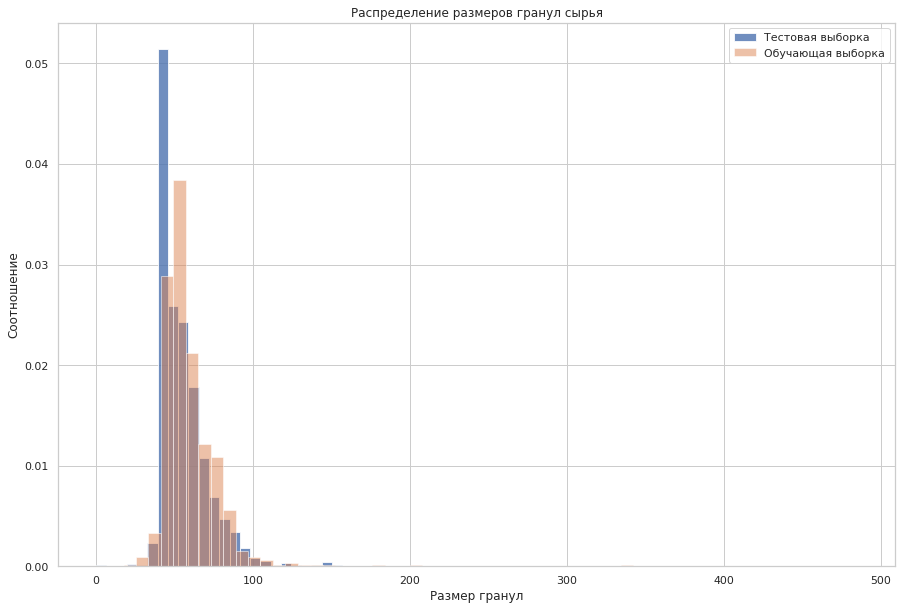

In [27]:
df_test['rougher.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=0.8, density=True) # density=True, чтобы масштаб был один
df_train['rougher.input.feed_size'].hist(figsize=(15, 10), bins=60, alpha=0.5, density=True) 
plt.legend(['Тестовая выборка', 'Обучающая выборка'])
plt.title('Распределение размеров гранул сырья')
plt.xlabel('Размер гранул')
plt.ylabel('Соотношение')
plt.show()

**Вывод**

Размер гранул и соотношение на обучающей и тестовой выборках минимальный, оценка модели должны быть правильной.

### Анализ суммарной концентрации всех веществ на разных стадиях: в сырье, черновом и финальном концентратах

In [28]:
df_sum = df.copy(deep=True)

In [29]:
# выборки суммарной концентрации всех веществ на каждом этапе очистки
df_sum['raw_sum'] = df[['rougher.input.feed_au', 'rougher.input.feed_ag', 
                              'rougher.input.feed_pb', 'rougher.input.feed_sol']].sum(axis=1)

# Суммарная концентрация всех веществ в черновом концентрате (первичная и вторичная очистки):

df_sum['rougher_sum'] = df[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 
                                            'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']].sum(axis=1)
df_sum['primary_sum'] = df[['primary_cleaner.output.concentrate_au',
                                              'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
                                              'primary_cleaner.output.concentrate_sol']].sum(axis=1)

# Суммарная концентрация всех веществ в финальном концентрате:

df_sum['final_sum'] = df[['final.output.concentrate_au', 
                                            'final.output.concentrate_ag', 'final.output.concentrate_pb', 
                                            'final.output.concentrate_sol']].sum(axis=1)


In [30]:
df_sum_final = df_sum[['raw_sum','rougher_sum','primary_sum','final_sum']]
df_sum_final.describe()

,raw_sum,rougher_sum,primary_sum,final_sum
count,19439.000000,19439.000000,19439.000000,19439.000000
mean,57.320789,68.170865,60.764731,68.653624
std,7.212680,12.491279,10.017271,7.427536
min,0.040000,0.000000,0.000000,0.000000
25%,53.557679,66.012495,58.929364,67.932362
50%,57.594391,70.181495,62.497674,69.598444
75%,61.953459,74.356904,65.667336,71.368472
max,76.978947,88.140119,80.749343,80.210644


In [31]:
def hist_sum_final(df):
    plt.figure(figsize=(20,10))
    plt.title('Концентрация всех веществ на разных стадиях очистки', fontsize=20)
    plt.ylabel('Концентрация веществ', fontsize=15)
    plt.xlabel('dslsd')
    plt.xticks(rotation=90)
    for column in df.columns:
        sns.histplot(data=df)
        
    plt.show()

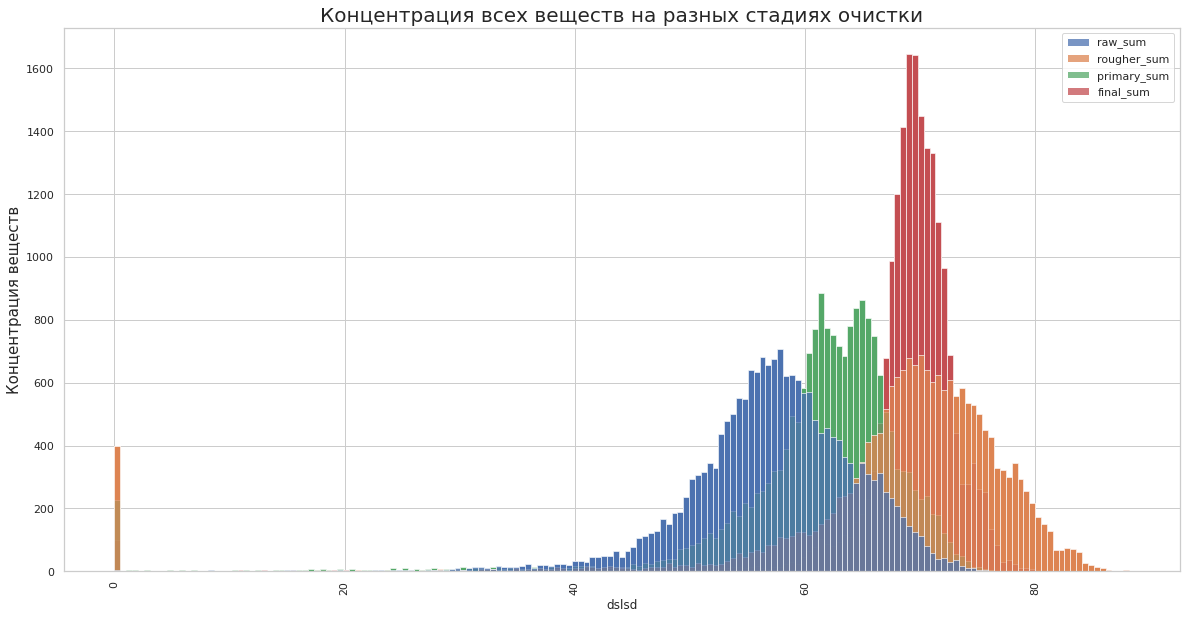

In [32]:
hist_sum_final(df_sum_final)

**Вывод**

На графике заметны аномальные околонулевые значения, вероятно они появились из-за  отсеивания на предыдущих стадиях. Удалим аномальные значения для избежания их влияния на анализ.

### Обработка аномальных значений

In [33]:
# удалим аномальные значения из исходных данных
df_sum = df_sum.query('(raw_sum >= 1) & (rougher_sum >= 1) & (primary_sum >= 1) & (final_sum >= 1)')

Проверим результат

In [34]:
(df_sum[['raw_sum','rougher_sum','primary_sum','final_sum']]).describe()

,raw_sum,rougher_sum,primary_sum,final_sum
count,18722.000000,18722.000000,18722.000000,18722.000000
mean,57.350936,69.633481,61.467680,69.035859
std,7.089930,7.651370,7.445848,5.458724
min,8.072476,2.016647,1.083422,1.976540
25%,53.552246,66.389891,59.094492,67.946259
50%,57.600880,70.345534,62.533581,69.609421
75%,61.956159,74.460165,65.658261,71.388643
max,76.978947,88.140119,80.749343,80.210644


In [35]:
# удалим аномалии из обучающей и тестовой выборок по индексам строк
# удаленных из исходных данных
df_train = df_train[df_train.index.isin(df_sum.index)]
df_test = df_test[df_test.index.isin(df_sum.index)]

In [36]:
print(df_sum.shape)
print(df_train.shape)
print(df_test.shape)

(18722, 90)
(13599, 54)
(5123, 54)


### Вывод

Был проведен анализ изменения концентрации металлов на всех этапах обработки.
* доля золота увеличилась до 42% 
* доля серебра уменьшилась до 15%  
* доля свинца увеличилась до 32%    

Распределение размеров гранул на обучающей и тестовой выборках практически идентично и не будет влиять на оценку модели.  
После анализа суммарной концентрации металлов на различных этапах, были обнаружены аномальные значения, влияющие на результат. Данные аномалии были удалены из всех данных.

## Модель

### Функция для вычисления итоговой sMAPE

Метрика качества, необходимая для оценки эффективности процесса очистки золотосодержащей руды — `sMAPE` (симметричное среднее абсолютное процентное отклонение).  

Метрика sMAPE вычисляется так:


$$sMAPE = \frac{1}{N} \sum_{i=1}^{N}\frac{\left | y_{i} -\
\hat{y}_{i}\right |}{\left ( \left | y_{i} \right | +\left | \hat{y}_{i} \right |\right )/2} *100\%$$  



 - Значение `целевого признака` для объекта с порядковым номером i в выборке, на которой измеряется качество: $$y_{i}$$   

 - Значение `предсказания` для объекта с порядковым номером i, например, в тестовой выборке: $$\hat{y}_{i}$$  

 - Количество `объектов` в выборке: $$N$$  

 - `Суммирование по всем объектам выборки` (i меняется от 1 до N). $$\sum_{i=1}^{N}$$

In [37]:
def smape_calc(target, prediction):
    '''
    Функция вычисления метрики smape
    '''
    diff = abs(target - prediction)
    add = (abs(target) + abs(prediction))/2
    smape_stage = 1/len(target)*sum(diff/add)*100
    
    return smape_stage

In [38]:
def final_smape(target, predictions):
    '''
    Функция вычисления итоговой метрики smape
    '''
    smape_r = smape_calc(target[0], predictions[0])
    smape_f = smape_calc(target[1], predictions[1])
    final_smape = 0.25*smape_r + 0.75*smape_f
    return final_smape

Укажем параметр ,`greater_is_better=False`, так как sMAPE — ошибка.

In [39]:
# Расчет метрики качества для выбранных моделей:
score = make_scorer(final_smape, greater_is_better=False)

Разделим выборки на `признаки` и `целевые признаки`:

In [40]:
x_train = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_train = df_train[['rougher.output.recovery', 'final.output.recovery']].to_numpy()


x_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_test = df_test[['rougher.output.recovery', 'final.output.recovery']].to_numpy()

### Обучим разные модели и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.

### Иницилизация моделей

In [42]:
tree_model = DecisionTreeRegressor()
random_forest_model = RandomForestRegressor()
regression_model = LinearRegression()

In [43]:
# Инициализация параметров для GridSearchCV:

params_tree= {'max_depth': range(3,8,1)}

params_forest = {'max_depth': range(3,8,1),'n_estimators': range(100, 130, 10)}

params_regression = {"n_jobs": [1, 2]}

In [44]:
grid_tree = GridSearchCV(tree_model, param_grid=params_tree, scoring=score, cv=5)
grid_forest = GridSearchCV(random_forest_model, param_grid=params_forest, scoring=score, cv=5)
grid_regression = GridSearchCV(regression_model, param_grid=params_regression, scoring=score, cv=5)

Обучим модели на двух таргетах

In [45]:
grid_tree.fit(x_train, y_train)

grid_forest.fit(x_train, y_train)

grid_regression.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={'n_jobs': [1, 2]},
             scoring=make_scorer(final_smape, greater_is_better=False))

In [46]:
print('Параметры лучших моделей')
print(grid_tree.best_estimator_)
print(grid_forest.best_estimator_)
print(grid_regression.best_estimator_)

Параметры лучших моделей
DecisionTreeRegressor(max_depth=5)
RandomForestRegressor(max_depth=5, n_estimators=110)
LinearRegression(n_jobs=1)


**Дерево решений**

In [47]:
%%time
cv_sc_tree = cross_val_score(DecisionTreeRegressor(random_state=12345, max_depth=5),
                             x_train,
                             y_train,
                             cv=5, scoring=score).mean()

print(f"Итоговое симметричное среднее абсолютное процентное отклонение: {cv_sc_tree:.3f}%")

Итоговое симметричное среднее абсолютное процентное отклонение: -12.123%
CPU times: user 1.41 s, sys: 0 ns, total: 1.41 s
Wall time: 1.42 s


**Случайный лес**

In [48]:
%%time
model = RandomForestRegressor(random_state=12345,max_depth=5, n_estimators=110)
cv_sc_forest = cross_val_score(model,
                               x_train,
                               y_train,
                               cv=5, scoring=score).mean()

print(f"Итоговое симметричное среднее абсолютное процентное отклонение: {cv_sc_forest:.3f}%")

Итоговое симметричное среднее абсолютное процентное отклонение: -11.177%
CPU times: user 1min 33s, sys: 15.8 ms, total: 1min 33s
Wall time: 1min 33s


**Линейная регрессия**

In [49]:
%%time
cv_sc_regression = cross_val_score(LinearRegression(),
                                   x_train,
                                   y_train,
                                   cv=5, scoring=score).mean()

print(f"Итоговое симметричное среднее абсолютное процентное отклонение: {cv_sc_regression:.3f}%")

Итоговое симметричное среднее абсолютное процентное отклонение: -12.048%
CPU times: user 801 ms, sys: 665 ms, total: 1.47 s
Wall time: 1.4 s


**Вывод**

Лучше всего себя показала модель `Случайный лес`:
* Итоговое симметричное среднее абсолютное процентное отклонение: -11.177%

Обучим модель на тестовой выборке.

**ElasticNet**

In [84]:
from sklearn.linear_model import ElasticNet

In [86]:
regr_elastic = ElasticNet(random_state=12345)
regr_elastic.fit(x_train, y_train)


ElasticNet(random_state=12345)

In [87]:
%%time
cv_sc_elastic = cross_val_score(ElasticNet(random_state=12345),
                             x_train,
                             y_train,
                             cv=5, scoring=score).mean()

print(f"Итоговое симметричное среднее абсолютное процентное отклонение: {cv_sc_elastic:.3f}%")

Итоговое симметричное среднее абсолютное процентное отклонение: -12.682%
CPU times: user 37.4 s, sys: 46.8 s, total: 1min 24s
Wall time: 1min 24s


### Проверка лучшей модели на тестовой выборке

In [52]:
best_model_forest = RandomForestRegressor(random_state=12345, max_depth=5, n_estimators=110)
best_model_forest.fit(x_train, y_train)
prediction = best_model_forest.predict(x_test)

smape_final = final_smape(y_test, prediction)


print(f"Итоговое симметричное среднее абсолютное процентное отклонение: {smape_final:.3f}%")

Итоговое симметричное среднее абсолютное процентное отклонение: 2.362%


### Сравнение с констнантной моделью

In [69]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)

dummy_predict = dummy_regr.predict(x_train)

In [72]:
final_smape(y_test, dummy_predict)

4.134423123725493

In [73]:
print(f"Итоговое симметричное среднее абсолютное процентное отклонение: {final_smape(y_test, dummy_predict):.3f}%")

Итоговое симметричное среднее абсолютное процентное отклонение: 4.134%


На константной модели:

* Итоговое симметричное среднее абсолютное процентное отклонение: 4.134%

Выбранная модель случайного леса справляется лучше константной модели.

## Вывод

Были проанализированы сырые данные, выгруженные из хранилища:

Предобработка данных:   

* определились с целевыми признаками и признаками, необходимыми для их оценки;  
* удалены лишние признаки;
* заполнены пропуски.  

Данные проанализированы: 
* Анализ концентрации металлов на различных этапах выявил прирост концентрации золота в 34%  
* Проведеное сравнение размеров гранул сырья в обучаемой и тестовой выборках, показало их идентичность 
* На этапе анализа суммарной концентрации всех веществ были выявлены и удалены аномальные значения  

Построена модель прогнозирования:

* Выведена метрика качества sMAPE  
* Осуществлен выбор наиболее подходящей модели для оценки эффективной работы промышленных предприятий  
* Наилучшая модель проверена на тестовой выборке  

* Итоговое симметричное среднее абсолютное процентное отклонение, выбранной модели случайного леса на тестовой выборке: `2.362%`
 

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке